In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import helper_functions as hf
import pyarrow.parquet as pq

In [2]:
yellow_data = hf.load_data('taxi_data/yellow_tripdata_2024-')

In [3]:
columns_to_drop = ['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee']

In [4]:
relevant_data = yellow_data.drop(columns_to_drop, axis=1)
relevant_data

tpep_pickup_datetime  PULocationID
0        2024-01-01 00:57:55           186
1        2024-01-01 00:03:00           140
2        2024-01-01 00:17:06           236
3        2024-01-01 00:36:38            79
4        2024-01-01 00:46:51           211
...                      ...           ...
5972145  2024-02-29 23:20:17           164
5972146  2024-02-29 23:38:37           249
5972147  2024-02-29 23:14:40           113
5972148  2024-02-29 23:12:06           164
5972149  2024-02-29 23:16:42            79

[5972150 rows x 2 columns]

In [9]:
df = relevant_data
df["hour"] = df["tpep_pickup_datetime"].dt.hour
df["day_of_week"] = df["tpep_pickup_datetime"].dt.dayofweek

Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones

C:\Users\grzec\AppData\Local\Temp\ipykernel_22920\1871680187.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(12, 8))


Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...


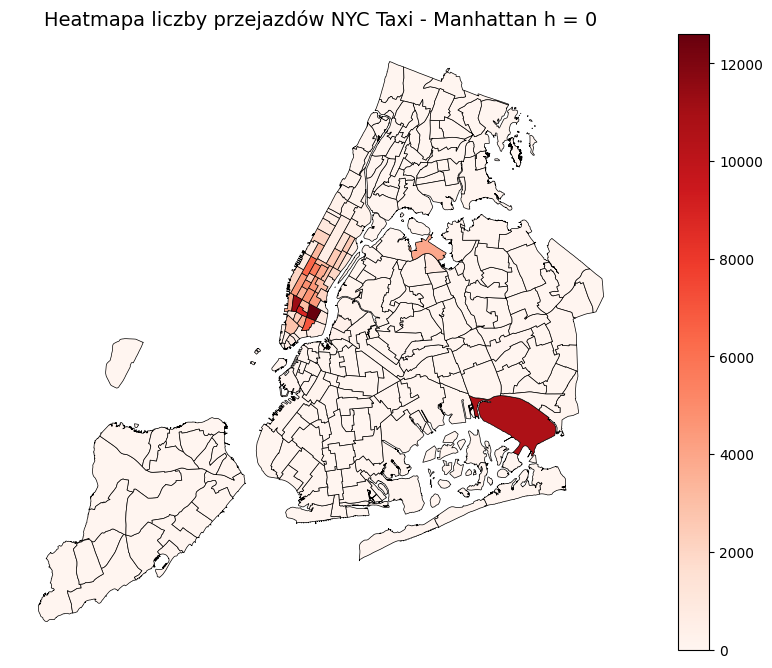

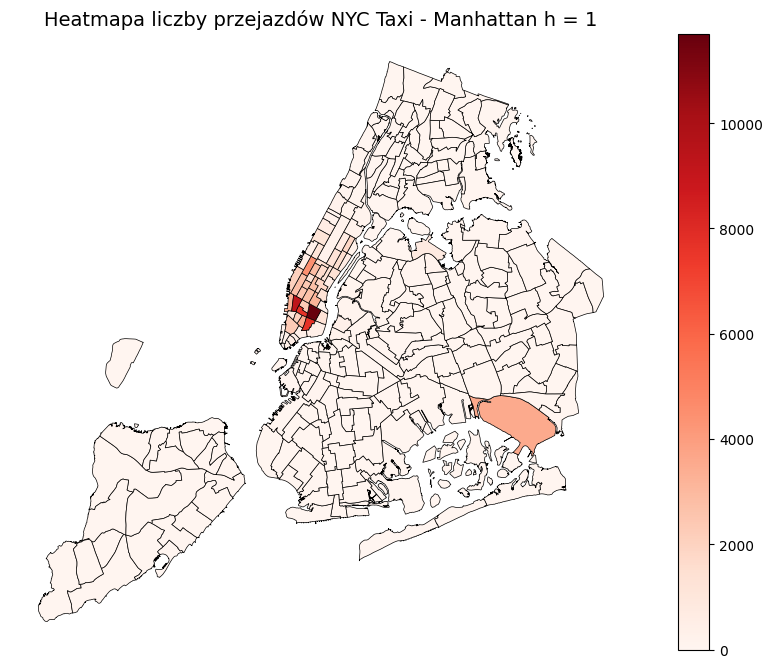

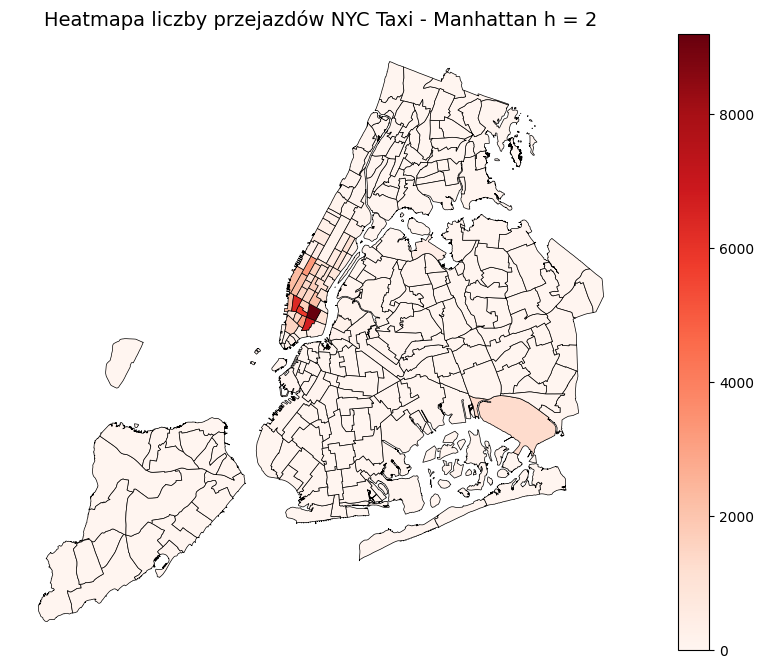

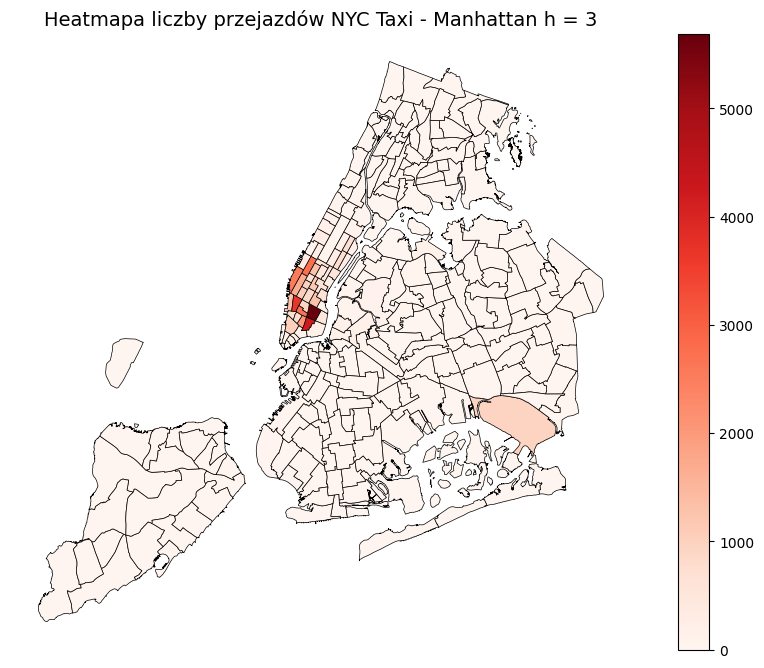

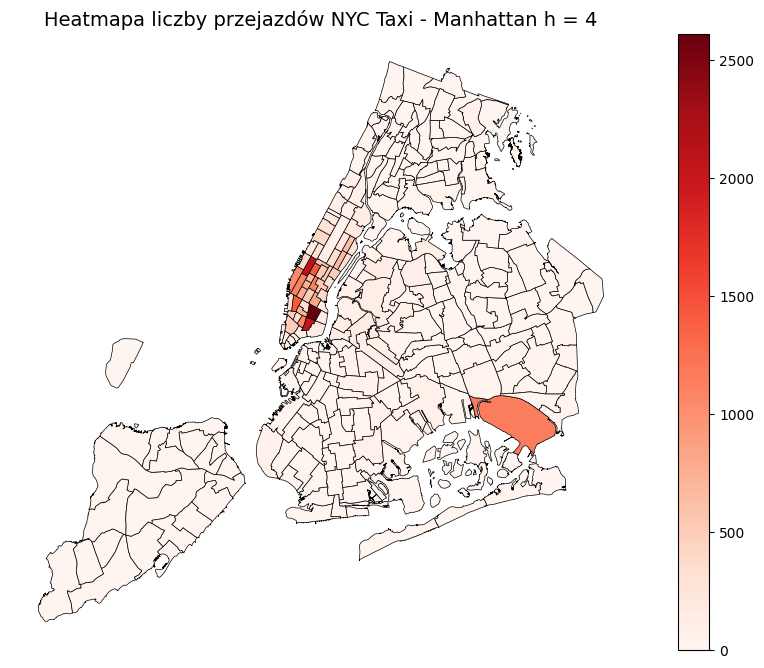

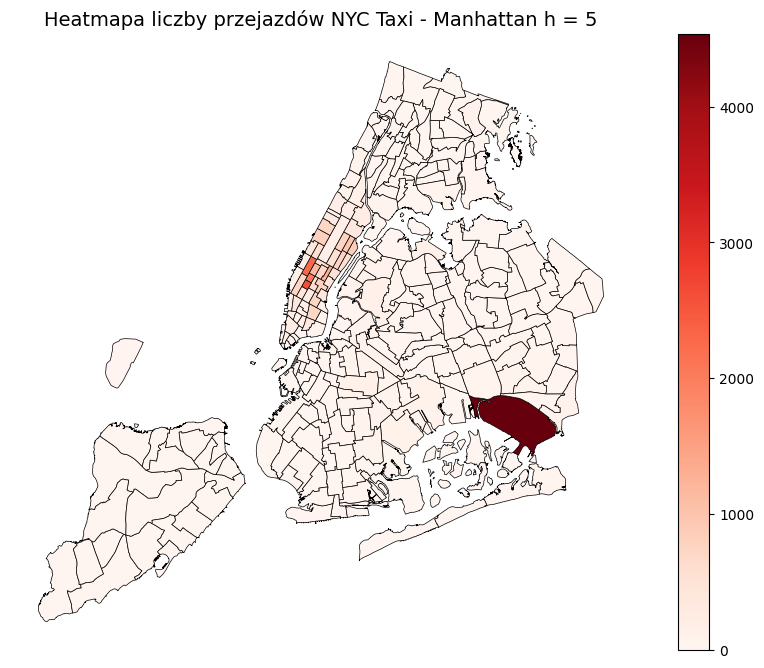

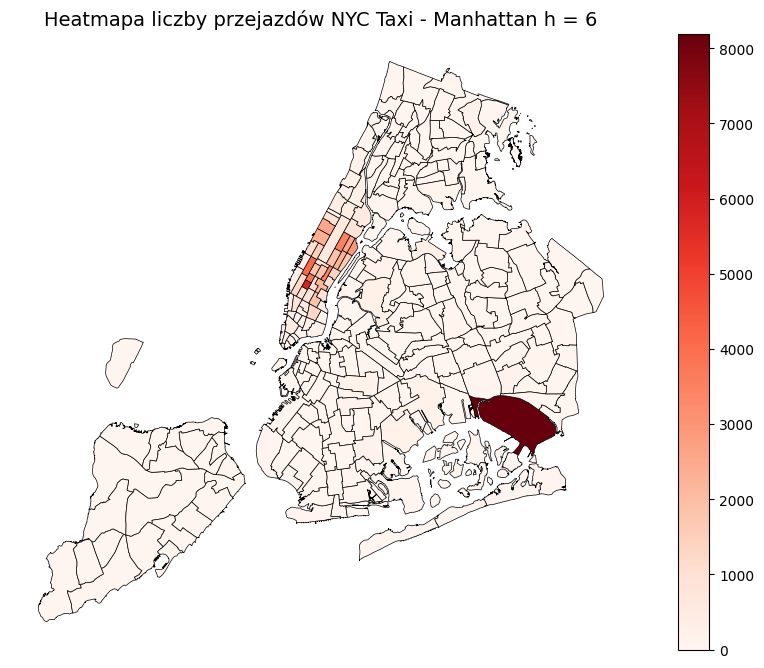

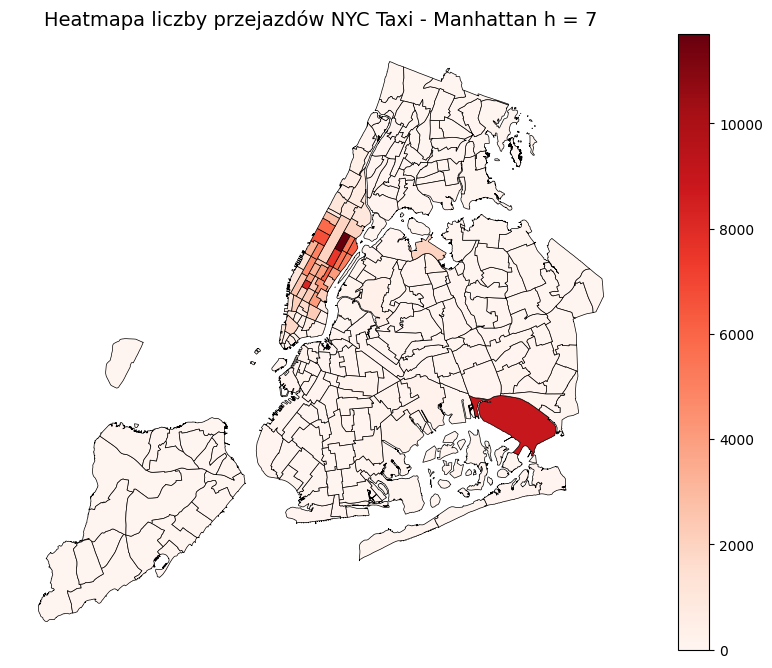

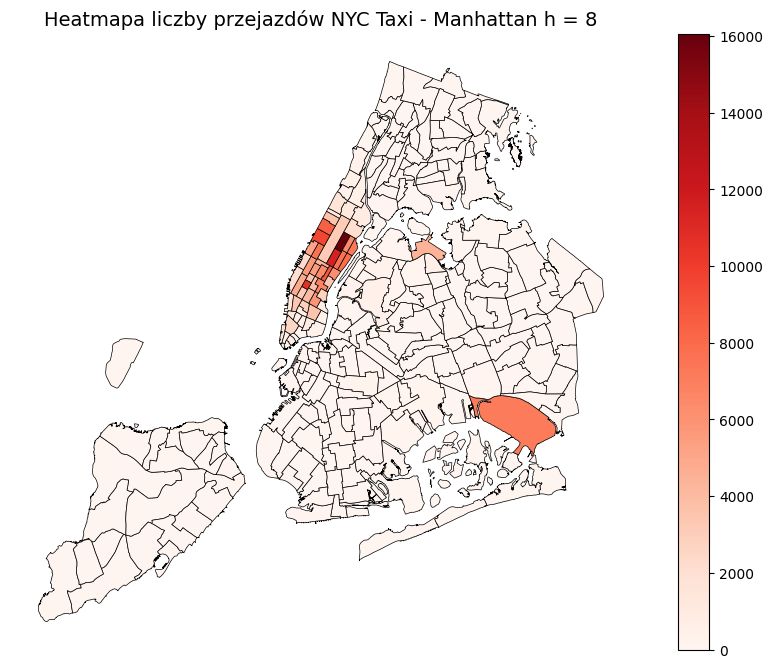

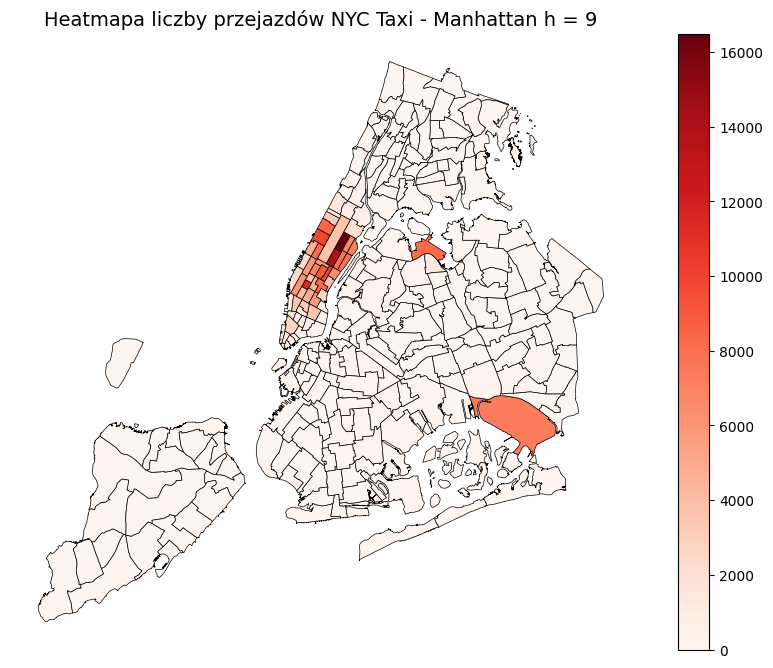

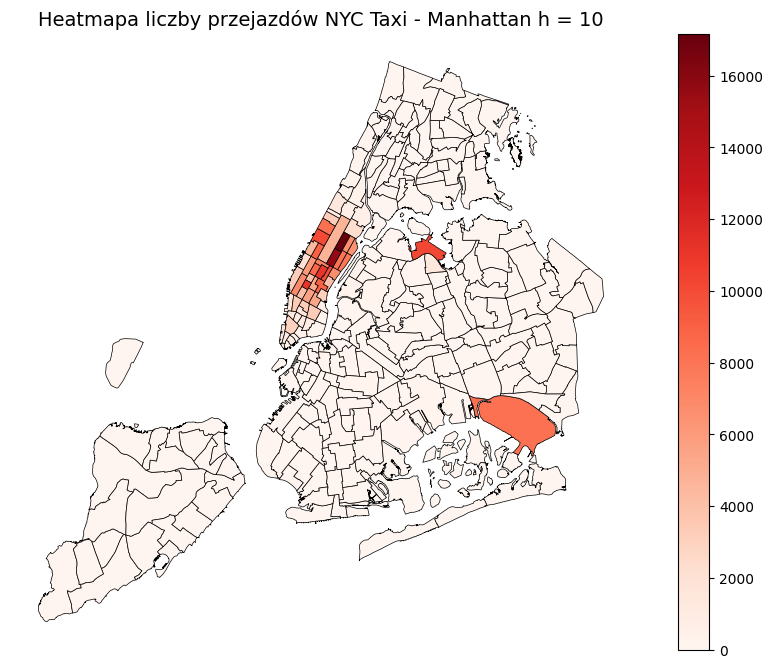

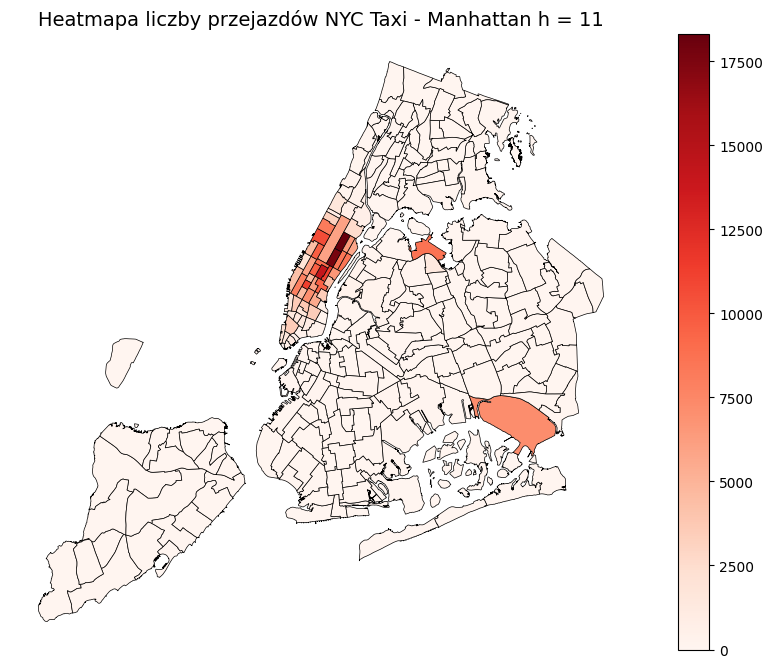

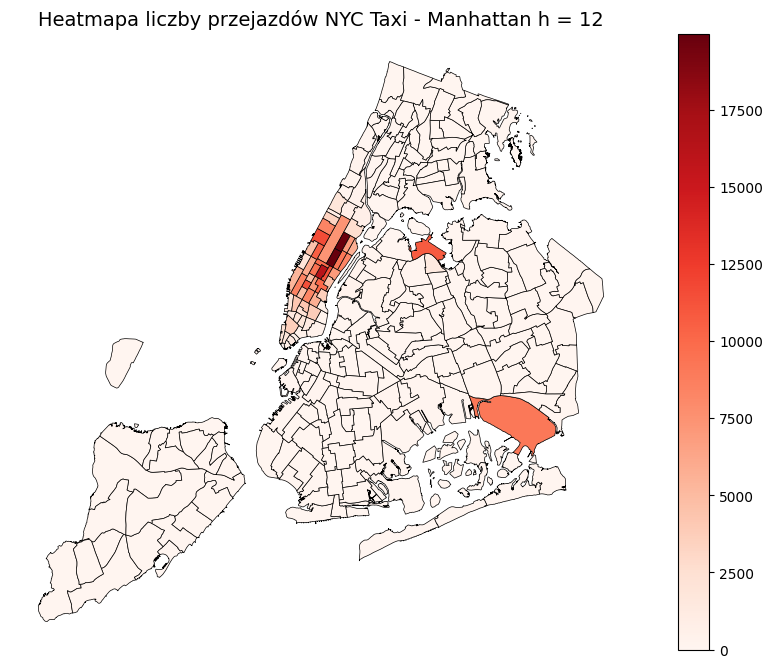

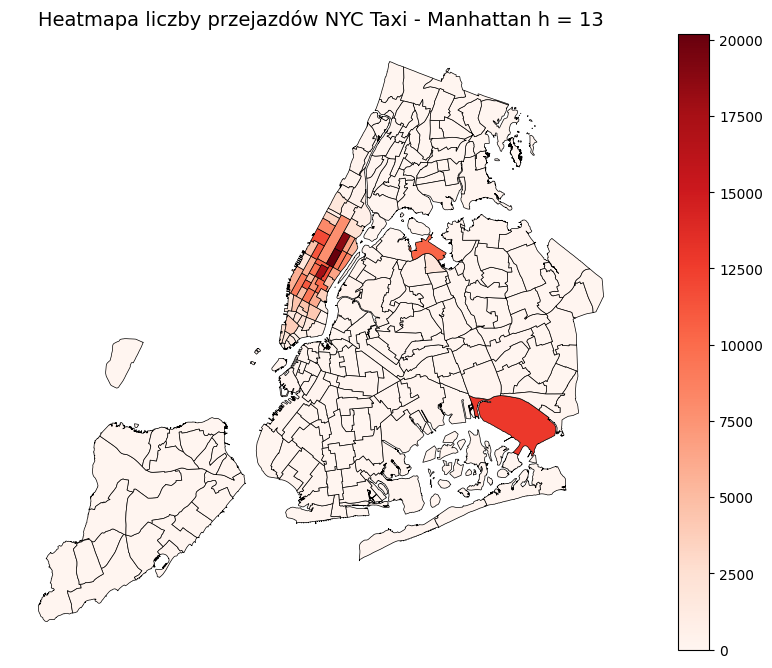

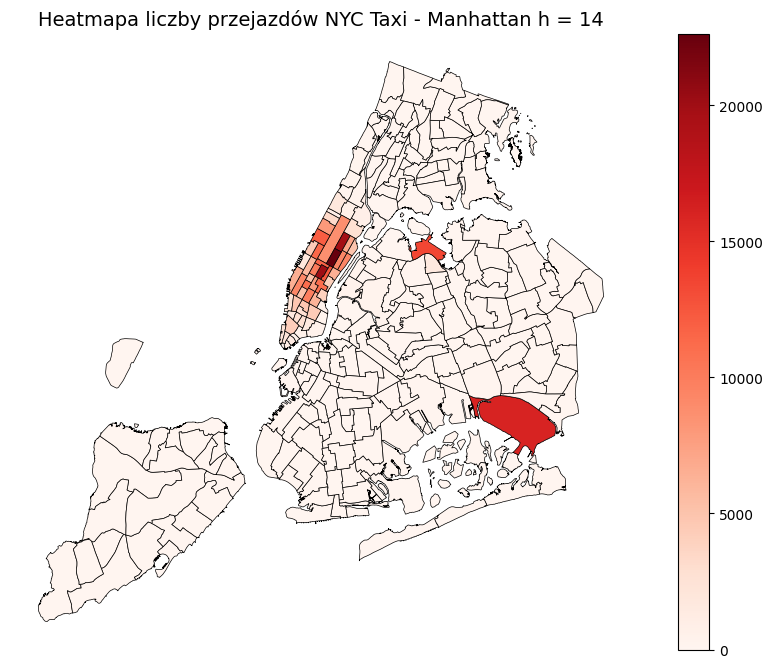

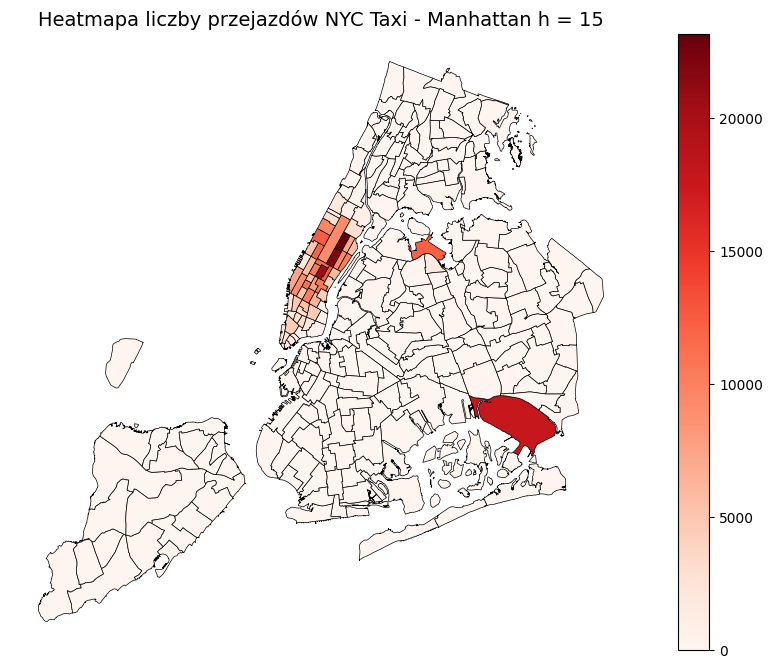

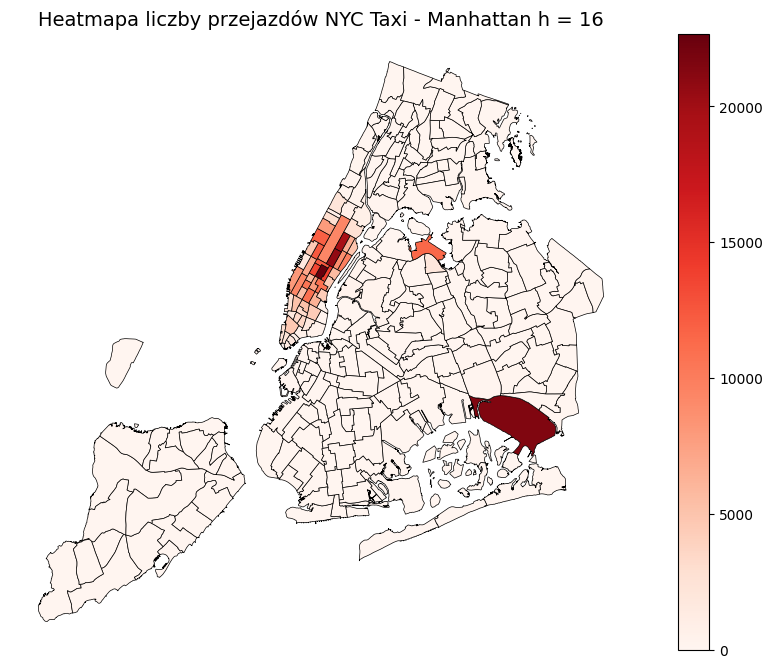

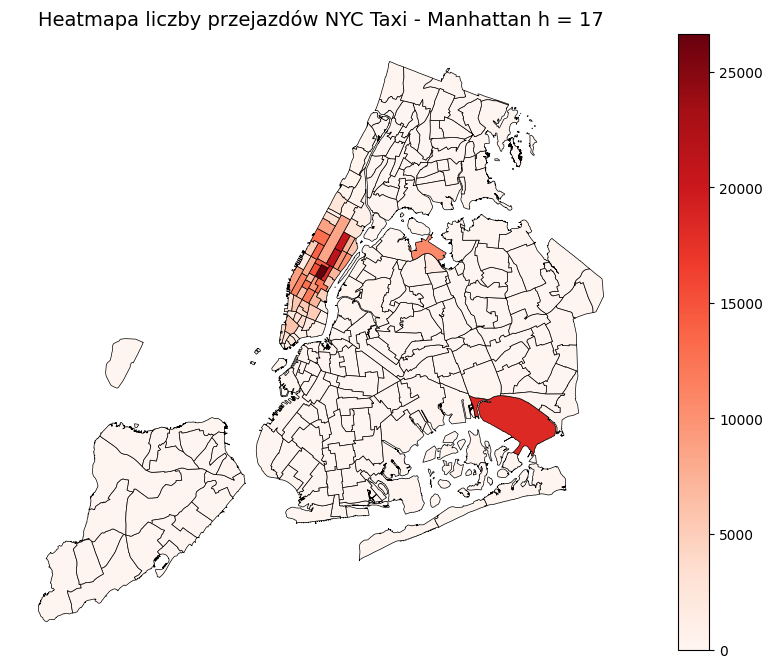

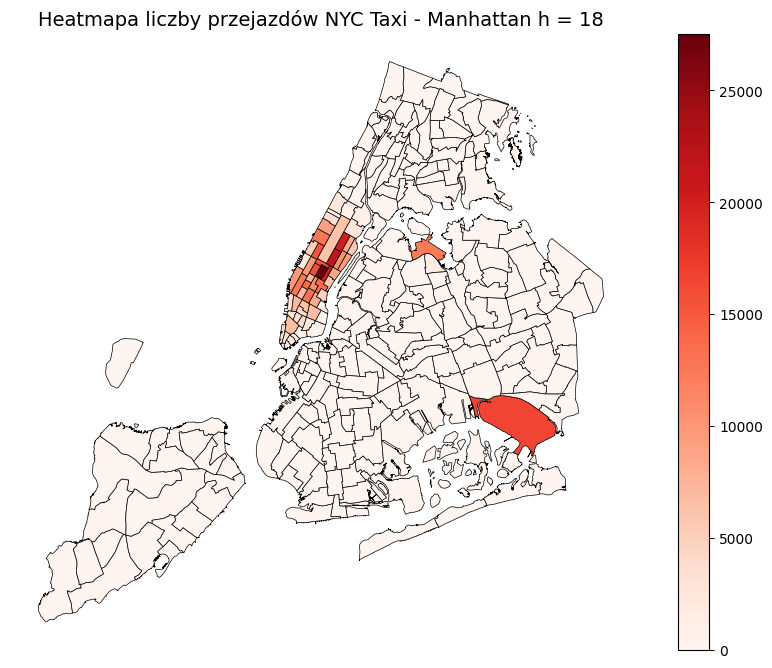

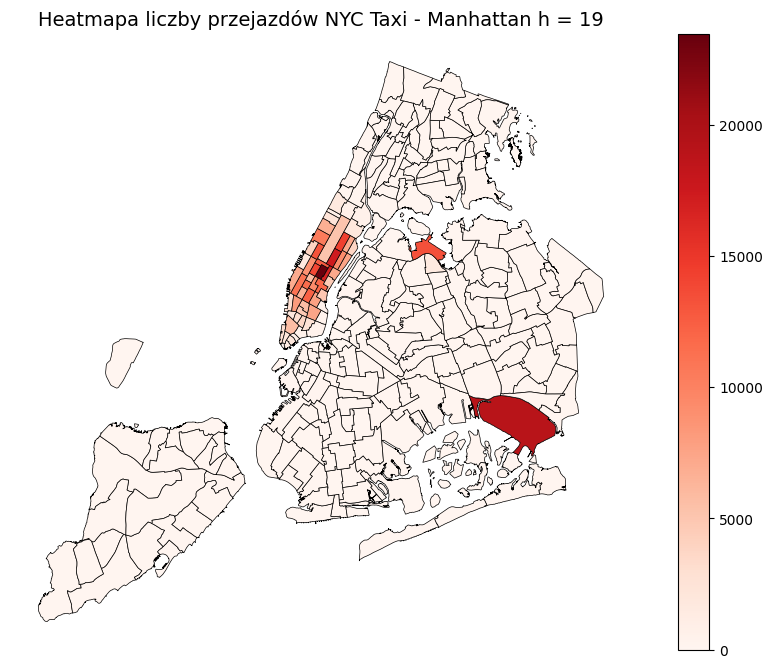

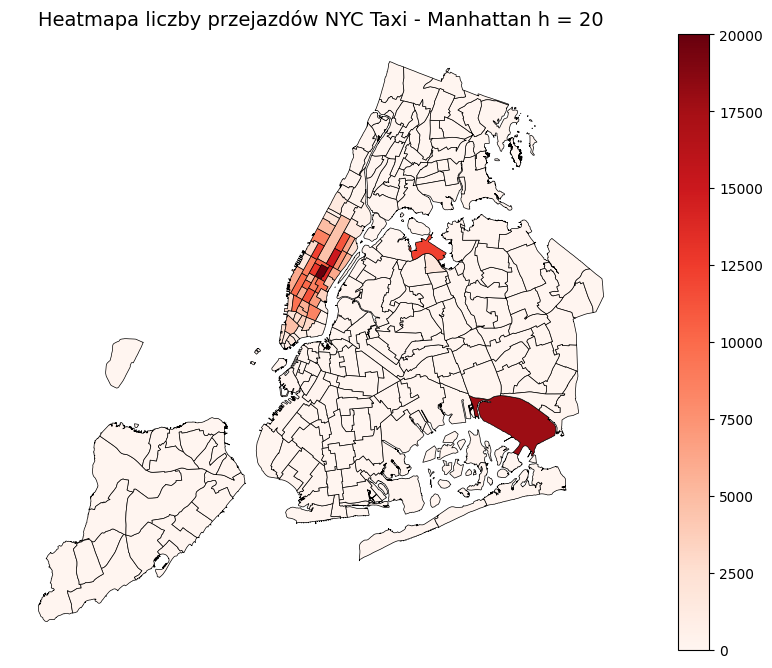

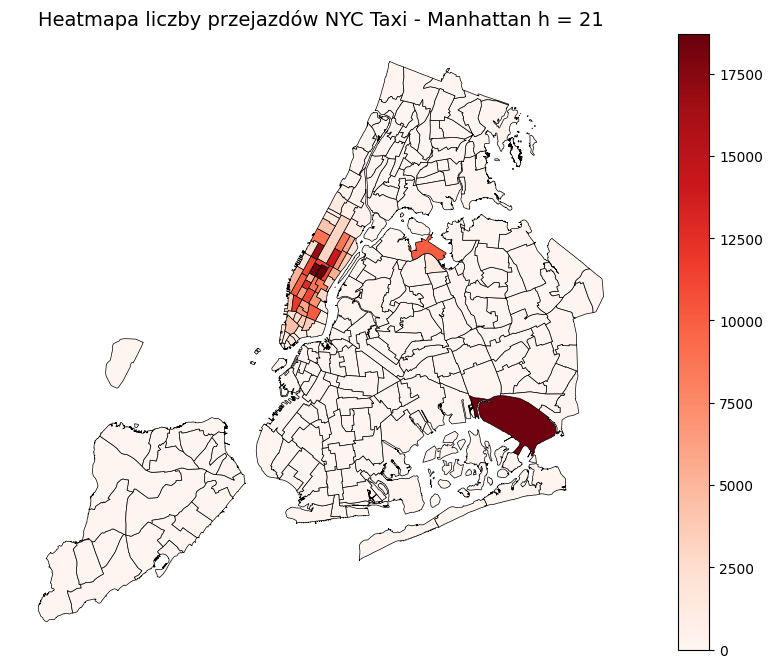

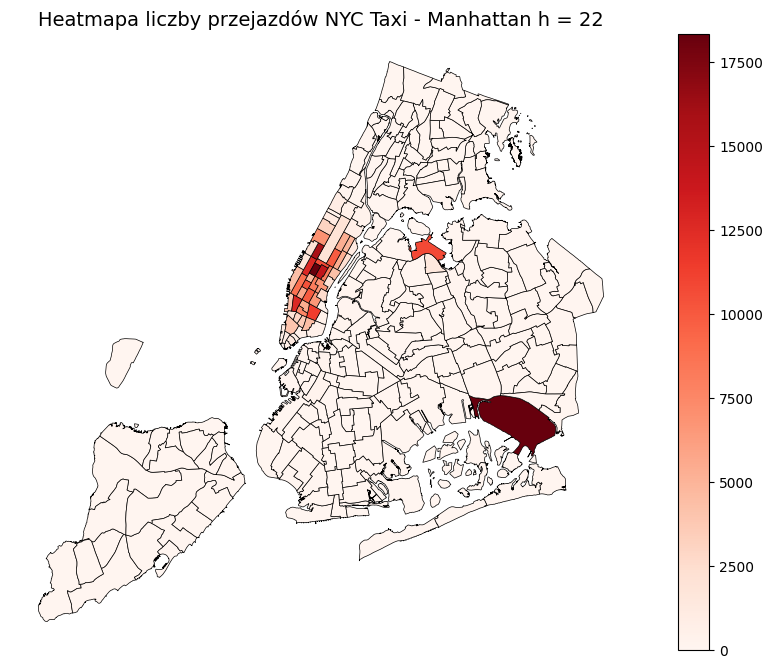

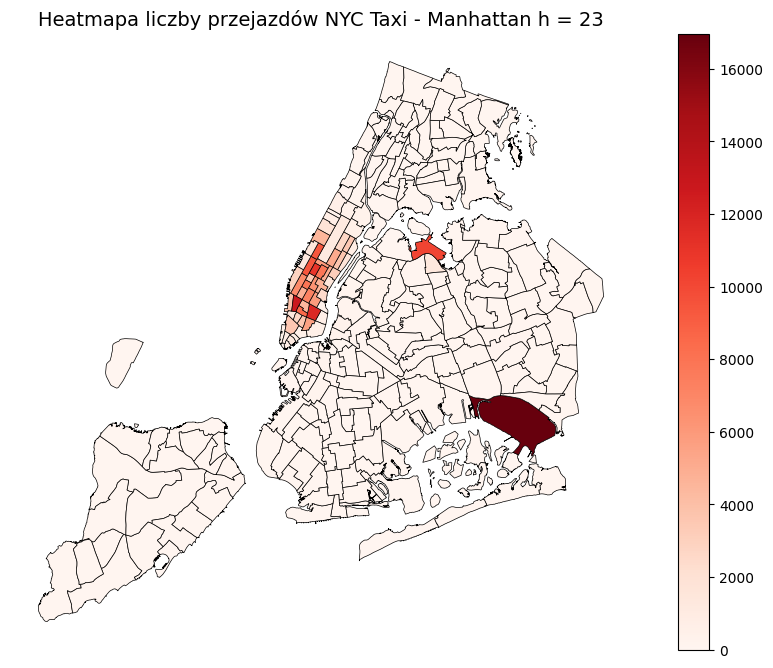

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

for i in range(24):
    
    filtered = df.query(f'hour == {i}')
    pickup_counts = filtered.groupby("PULocationID").size().reset_index(name="ride_count")

    print("Wczytywanie mapy NYC Taxi Zones...")
    zones = gpd.read_file("taxi_zones.shp")

    zones["LocationID"] = zones["LocationID"].astype(int)
    
    zones = zones.merge(pickup_counts, left_on="LocationID", right_on="PULocationID", how="left")
    zones["ride_count"] = zones["ride_count"].fillna(0)

    print("Tworzenie heatmapy...")
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    zones.plot(column="ride_count", cmap="Reds", linewidth=0.5, edgecolor="black", legend=True, ax=ax)

    plt.title(f"Heatmapa liczby przejazdów NYC Taxi - Manhattan h = {i}", fontsize=14)
    plt.axis("off")

    plt.savefig('yellow_maps/map_hour_'+ str(i) + '.png')